In [2]:
import csv
import math as m
import networkx as nx

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

# Problem Instance

In [3]:
xy_customers = list(csv.reader(
    open('./datasets/original/xy_customers.csv'),delimiter=';',
    quoting=csv.QUOTE_NONNUMERIC))

xy_icps = list(csv.reader(
    open('./datasets/original/xy_icps.csv'),delimiter=';',
    quoting=csv.QUOTE_NONNUMERIC))

xy_crcs = list(csv.reader(
    open('./datasets/original/xy_crcs.csv'),delimiter=';',
    quoting=csv.QUOTE_NONNUMERIC))

In [4]:
I = len(xy_customers)
J = len(xy_icps)
C = len(xy_crcs)

In [5]:
W = [[m.sqrt((cus[0]-icp[0])**2 + (cus[1]-icp[1])**2) for icp in xy_icps] for cus in xy_customers]

In [6]:
D = [[m.sqrt((icp[0]-crc[0])**2 + (icp[1]-crc[1])**2) for crc in xy_crcs] for icp in xy_icps ]

In [7]:
FCT = [100 for i in range(J)]

In [8]:
FCR = [200 for i in range(C)]

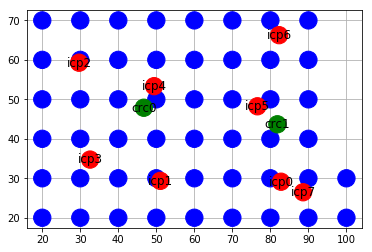

In [9]:
from pkg.lrp_nodes_graph import lrp_nodes_graph
G, pos, labels, colors = lrp_nodes_graph(xy_customers, xy_icps, xy_crcs)

plt.grid('on')
nx.draw_networkx(G,pos,labels=labels,node_color=colors,with_labels=True)
plt.show()

# Facility location

## UFLP

In [10]:
from pkg.uflp_cplex import uflp_cplex

prob, Y, N_icp = uflp_cplex(I,J,
            W,FCT,
            relaxation=False,path="uflp_cplex.lp")

Default row names c1, c2 ... being created.


Found incumbent of value 1989.529822 after 0.00 sec. (0.04 ticks)
Tried aggregator 1 time.
Reduced MIP has 450 rows, 408 columns, and 1200 nonzeros.
Reduced MIP has 408 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.05 sec. (1.19 ticks)
Probing time = 0.02 sec. (0.27 ticks)
Tried aggregator 1 time.
Reduced MIP has 450 rows, 408 columns, and 1200 nonzeros.
Reduced MIP has 408 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.03 sec. (1.18 ticks)
Probing time = 0.02 sec. (0.27 ticks)
Clique table members: 450.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.02 sec. (0.76 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                         1989.5298        0.0000           100.00%
*     0+    0                        

In [11]:
G2 = G.copy()

for j,vj in enumerate(Y):
    for i,vi in enumerate(vj):
        if vi == 1:
            G2.add_edge(I+i,j)

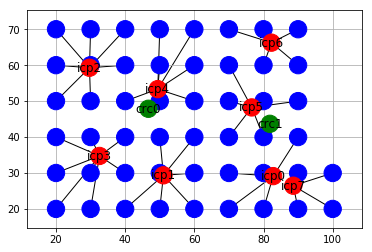

In [40]:
plt.grid('on')
nx.draw_networkx(G2,pos,labels=labels,node_color=colors,with_labels=True)
plt.savefig("uflp_cplex.png", format="PNG")

## CFLP

In [13]:
Uq = list(csv.reader(
    open('./datasets/original/U.csv'),delimiter=' ',
    quoting=csv.QUOTE_NONNUMERIC))

In [14]:
U = []
for i in range(I):
    U.append(Uq[0][i] + Uq[1][i] + Uq[2][i])
    
Q = [200 for j in range(J)]

In [17]:
from pkg.cflp_cplex import cflp_cplex

prob, Y, N_icp = cflp_cplex(I,J,
            W,FCT,U,Q,
            relaxation=False,path="cflp_cplex.lp")

Default row names c1, c2 ... being created.


Found incumbent of value 1989.529822 after 0.00 sec. (0.03 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 42 rows and 336 columns.
MIP Presolve modified 8 coefficients.
Reduced MIP has 16 rows, 72 columns, and 136 nonzeros.
Reduced MIP has 72 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.03 sec. (0.25 ticks)
Probing time = 0.00 sec. (0.06 ticks)
Tried aggregator 1 time.
Reduced MIP has 16 rows, 72 columns, and 136 nonzeros.
Reduced MIP has 72 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (0.09 ticks)
Probing time = 0.02 sec. (0.06 ticks)
Clique table members: 72.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.03 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                         1

In [19]:
G2 = G.copy()

for j,vj in enumerate(Y):
    for i,vi in enumerate(vj):
        if vi == 1:
            G2.add_edge(I+i,j)

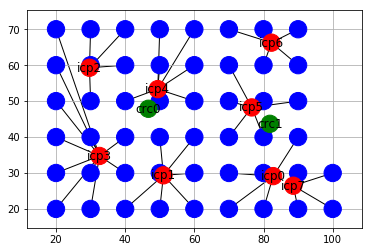

In [20]:
plt.grid('on')
nx.draw_networkx(G2,pos,labels=labels,node_color=colors,with_labels=True)
plt.show()

## TUFLP

In [27]:
c = [[[W[i][j1] + D[j1][j2] for j2 in range(C)] for j1 in range(J)] for i in range(I)]
f = FCT+FCR

In [41]:
from pkg.tuflp_cplex import tuflp_cplex

prob, X, Z = tuflp_cplex(I,J,C,c,f,
            relaxation=False,path="./tuflp_cplex.lp")

Default row names c1, c2 ... being created.


Tried aggregator 1 time.
Reduced MIP has 550 rows, 810 columns, and 2900 nonzeros.
Reduced MIP has 810 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (2.69 ticks)
Found incumbent of value 3334.720869 after 0.00 sec. (3.17 ticks)
Probing time = 0.00 sec. (0.83 ticks)
Tried aggregator 1 time.
Reduced MIP has 550 rows, 810 columns, and 2900 nonzeros.
Reduced MIP has 810 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (2.68 ticks)
Probing time = 0.00 sec. (0.83 ticks)
Clique table members: 550.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (1.05 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                         3334.7209        0.0000           100.00%
*     0     0      integral     0    

In [51]:
import pandas as pd
X[1]

array([[-0., -0.],
       [-0., -0.],
       [-0., -0.],
       [ 0., -0.],
       [ 1., -0.],
       [-0., -0.],
       [-0., -0.],
       [-0., -0.]])

In [56]:
G2 = G.copy()

for i in range(I):
    for j1 in range(J):
        for j2 in range(C):
            if X[i][j1][j2] == 1:
                G2.add_edge(i,I+j1)

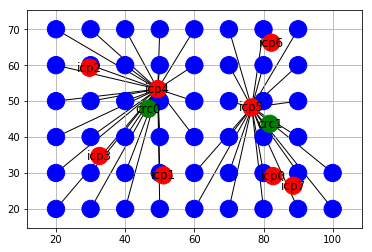

In [58]:
plt.grid('on')
nx.draw_networkx(G2,pos,labels=labels,node_color=colors,with_labels=True)
plt.show()

## TCFLP

In [24]:
c = [[[W[i][j1] + D[j1][j2] for j2 in range(C)] for j1 in range(J)] for i in range(I)]
c = [[[W[i][j1] for j2 in range(C)] for j1 in range(J)] for i in range(I)]
f = FCT+FCR

q = []
for i in range(I):
    q.append(Uq[0][i] + Uq[1][i] + Uq[2][i])
    
V = [[200 for j in range(J)],[800 for c in range(C)]]

In [33]:
from pkg.tecflp_cplex import tecflp_cplex

prob, X, Z = tecflp_cplex(I,J,C,c,f,q,V,
            relaxation=False,path="./tecflp_cplex.lp")

Default row names c1, c2 ... being created.


Tried aggregator 1 time.
MIP Presolve modified 10 coefficients.
Reduced MIP has 60 rows, 810 columns, and 2410 nonzeros.
Reduced MIP has 810 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.03 sec. (1.34 ticks)
Found incumbent of value 2778.549806 after 0.05 sec. (3.83 ticks)
Probing time = 0.02 sec. (1.62 ticks)
Tried aggregator 1 time.
Reduced MIP has 60 rows, 810 columns, and 2410 nonzeros.
Reduced MIP has 810 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (1.30 ticks)
Probing time = 0.02 sec. (1.62 ticks)
Clique table members: 1650.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.76 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                         2778.5498        0.0000           100.00%

In [34]:
G2 = G.copy()

for i in range(I):
    for j1 in range(J):
        for j2 in range(C):
            if X[i][j1][j2] == 1:
                G2.add_edge(i,I+j1)

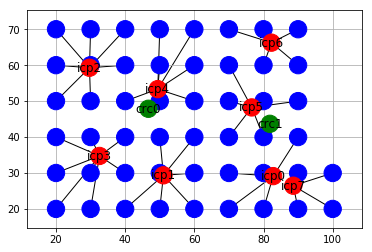

In [35]:
plt.grid('on')
nx.draw_networkx(G2,pos,labels=labels,node_color=colors,with_labels=True)
plt.show()